## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')


## Importing DataSet

In [2]:
train=pd.read_csv(r"C:\Users\Lenovo\Downloads\Voks train.csv")

test=pd.read_csv(r"C:\Users\Lenovo\Downloads\Voks test.csv")

## Shape of Data

In [3]:
train.shape,test.shape

((105000, 34), (42000, 33))

In [4]:
train.head()

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job,income
0,0,2004,0,2,High school,White,United-States,Associates degree-academic program,Householder,Business and repair services,...,No,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
1,1,2005,0,0,College/University,White,Japan,Children,Child <18 never marr not in subfamily,Not in universe or children,...,No,0,Both_Pr,0.0,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces,More than 50K $
2,2,2004,0,2,NaN,White,United-States,Some college but no degree,Secondary individual,Manufacturing-durable goods,...,Yes,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $
3,3,2004,0,2,College/University,Amer/Indian/Aleut/Eskimo,United-States,High school graduate,Householder,Wholesale trade,...,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
4,4,2004,0,2,NaN,White,United-States,High school graduate,Householder,Wholesale trade,...,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  105000 non-null  int64  
 1   year_of_poll        105000 non-null  int64  
 2   own_self_emp        105000 non-null  int64  
 3   veteran benefits    105000 non-null  int64  
 4   currently_enrolled  73557 non-null   object 
 5   race                105000 non-null  object 
 6   father_country      105000 non-null  object 
 7   educ                105000 non-null  object 
 8   house_stat          104989 non-null  object 
 9   major_ind_code      105000 non-null  object 
 10  labour_union        69669 non-null   object 
 11  self_country        105000 non-null  object 
 12  major_occ_code      51945 non-null   object 
 13  age                 105000 non-null  int64  
 14  mother_country      105000 non-null  object 
 15  house_summary       105000 non-nul

## Combining Test And Train

In [6]:
combine=train.append(test)

In [7]:
combine.shape

(147000, 34)

## Analysis of Data

 * we have lots of category so lets just do EDA first and then Visualization

# EDA

## Gains,Losses, Dividends

* These three columns have 90 percent + values zero so lets convert them in zero and one .

In [8]:
combine['gains']=combine['gains'].apply(lambda x: 0 if x==0.0 else 1)

combine['losses']=combine['losses'].apply(lambda x: 0 if x==0.0 else 1)

combine['dividends']=combine['dividends'].apply(lambda x: 0 if x==0.0 else 1)

## Year Of Poll

In [9]:
combine['year_of_poll'].unique()

array([2004, 2005], dtype=int64)

In [10]:
#lets convert year of poll to categorical
combine['year_of_poll']=combine['year_of_poll'].astype('object')

## Currently Enrolled Binning

In [11]:
def mapppe(x):
    if x==' High school':
        return 2
    
    elif x=='College/University':
        return 1
    
    else:
        return 0
    

In [12]:
# currently enrolled
combine['currently_enrolled']=combine['currently_enrolled'].apply(mapppe)

## Race

In [13]:
#race
def race(x):
    if x==' White':
        return ('White')
    
    if x==' Black':
        return ('Black')
    
    else:
        return ('others')

In [14]:
combine['race']=combine['race'].apply(race)

## Chi Square Test for checking relevence of Country columns

In [15]:
from scipy.stats import chi2_contingency

In [16]:
#Ho: not relevant
#Ha: relevent


In [17]:
# contigency Table for father country
tbl=pd.crosstab(combine.father_country,combine.income)
chi2, p, dof, ex = chi2_contingency(tbl, correction=False)
print(p) 

1.20696112370483e-05


In [18]:
# contigency Table for self country
tbl=pd.crosstab(combine.self_country,combine.income)
chi2, p, dof, ex = chi2_contingency(tbl, correction=False)
print(p)

0.0010242700211882283


In [19]:
# contigency Table for Mother country
tbl=pd.crosstab(combine.mother_country,combine.income)
chi2, p, dof, ex = chi2_contingency(tbl, correction=False)
print(p)

2.1508053477525524e-07


### We can see that all three colums are relevent Here

 * lets just make a function and apply on all three

In [20]:
# mother country

combine['mother_country'].unique()

array([' United-States', ' Puerto-Rico', ' Philippines', ' Haiti',
       ' Mexico', ' Dominican-Republic', ' ?', ' Guatemala', ' Italy',
       ' Cuba', ' Canada', ' El-Salvador', ' Hungary', ' Nicaragua',
       ' England', ' Vietnam', ' China', ' Peru', ' Germany', ' Greece',
       ' Ireland', ' Poland', ' Japan', ' Yugoslavia', ' South Korea',
       ' Trinadad&Tobago', ' Portugal', ' Laos', ' Scotland', ' India',
       ' Columbia', ' Iran', ' France', ' Cambodia',
       ' Outlying-U S (Guam USVI etc)', ' Honduras', ' Jamaica',
       ' Ecuador', ' Thailand', ' Taiwan', ' Hong Kong',
       ' Holand-Netherlands', ' Panama'], dtype=object)

In [21]:
lst=[' United-States',' Mexico',' Canada',' Cuba',' Haiti']

* Maximum enteries are from United States

In [22]:
def mother(x):
    if x in lst:
        return ('America')
        
    else:
        return ('others')

In [23]:
combine['mother_country']=combine['mother_country'].apply(mother)

combine['father_country']=combine['father_country'].apply(mother)

combine['self_country']=combine['self_country'].apply(mother)

## Educ

In [24]:
#educ
combine['educ'].unique()

array([' Associates degree-academic program', ' Children',
       ' Some college but no degree', ' High school graduate',
       ' 10th grade', ' Prof school degree (MD DDS DVM LLB JD)',
       ' Bachelors degree(BA AB BS)', ' 7th and 8th grade',
       ' 5th or 6th grade', ' 9th grade', ' 11th grade',
       ' Masters degree(MA MS MEng MEd MSW MBA)',
       ' Associates degree-occup /vocational',
       ' 1st 2nd 3rd or 4th grade', ' Less than 1st grade',
       ' 12th grade no diploma', ' Doctorate degree(PhD EdD)'],
      dtype=object)

In [25]:
lst1=[' Doctorate degree(PhD EdD)',' Prof school degree (MD DDS DVM LLB JD)',
      ' Masters degree(MA MS MEng MEd MSW MBA)',' Bachelors degree(BA AB BS)',
     ' Associates degree-occup /vocational',' Associates degree-academic program']

lst2=[' High school graduate',' 10th grade']

lst3=[' 12th grade no diploma',' Some college but no degree',' 11th grade']

lst4=[' Children']

## Binning of educ column

In [26]:
# check distribution with target
train.groupby('educ')['income'].describe()

,count,unique,top,freq
educ,,,,
10th grade,3962,2,Less than 50K $,2615
11th grade,3611,2,Less than 50K $,2402
12th grade no diploma,1082,2,Less than 50K $,687
1st 2nd 3rd or 4th grade,963,2,Less than 50K $,649
5th or 6th grade,1735,2,Less than 50K $,1173
7th and 8th grade,4239,2,Less than 50K $,2831
9th grade,3275,2,Less than 50K $,2177
Associates degree-academic program,2289,2,Less than 50K $,1378
Associates degree-occup /vocational,2857,2,Less than 50K $,1789


In [27]:
def edu(x):
    if x in lst1:
        return 0
    elif x in lst3:
        return 1
    
    elif x in lst2:
        return 2
    
    elif x in lst4:
        return 3
    
    else:
        return 4
        
        
    

In [28]:
#changing values according to target distribution
combine['educ']=combine['educ'].apply(edu)

## House Stats

In [29]:
# House Stat

combine['house_stat'].unique()

array([' Householder', ' Child <18 never marr not in subfamily',
       ' Secondary individual',
       ' Child 18+ never marr Not in a subfamily',
       ' Spouse of householder', ' Nonfamily householder',
       ' Other Rel 18+ never marr not in subfamily',
       ' Child 18+ never marr RP of subfamily',
       ' Child 18+ ever marr RP of subfamily',
       ' Other Rel <18 never marr not in subfamily',
       ' Other Rel 18+ ever marr not in subfamily',
       ' RP of unrelated subfamily',
       ' Other Rel <18 never marr child of subfamily RP',
       ' Child under 18 of RP of unrel subfamily',
       ' Grandchild <18 never marr child of subfamily RP',
       ' Other Rel 18+ spouse of subfamily RP',
       ' Grandchild <18 never marr not in subfamily',
       ' Child <18 never marr RP of subfamily',
       ' Other Rel 18+ ever marr RP of subfamily',
       ' Child <18 ever marr RP of subfamily',
       ' Child 18+ ever marr Not in a subfamily',
       ' Child 18+ spouse of subfamil

In [30]:
train.groupby('house_stat')['income'].describe()

,count,unique,top,freq
house_stat,,,,
Child 18+ ever marr Not in a subfamily,547,2,Less than 50K $,340
Child 18+ ever marr RP of subfamily,350,2,Less than 50K $,233
Child 18+ never marr Not in a subfamily,6320,2,Less than 50K $,4142
Child 18+ never marr RP of subfamily,308,2,Less than 50K $,203
Child 18+ spouse of subfamily RP,64,2,Less than 50K $,38
Child <18 ever marr RP of subfamily,3,2,Less than 50K $,2
Child <18 ever marr not in subfamily,14,2,Less than 50K $,9
Child <18 never marr RP of subfamily,46,2,Less than 50K $,30
Child <18 never marr not in subfamily,26380,2,Less than 50K $,17424


In [31]:
lst1=[' Child <18 never marr not in subfamily',' Child <18 never marr RP of subfamily',
     ' Child <18 ever marr not in subfamily',' Child <18 ever marr RP of subfamily',
     ' Grandchild <18 never marr child of subfamily RP',' Grandchild <18 never marr not in subfamily',
     ' Other Rel <18 never marr not in subfamily',' Other Rel <18 never marr child of subfamily RP',
     ' Other Rel <18 never married RP of subfamily',' Child under 18 of RP of unrel subfamily']

lst2=[' Householder',' Spouse of householder',' Nonfamily householder']

lst3=[' Child 18+ never marr Not in a subfamily',' Child 18+ ever marr Not in a subfamily',
     ' Child 18+ never marr RP of subfamily',' Child 18+ ever marr RP of subfamily',
     ' Child 18+ spouse of subfamily RP',' Grandchild 18+ spouse of subfamily RP',
      ' Grandchild 18+ ever marr not in subfamily',' Grandchild 18+ ever marr RP of subfamily',
     ' Grandchild 18+ never marr not in subfamily',' Other Rel 18+ never marr not in subfamily',
      ' Other Rel 18+ ever marr not in subfamily',' Other Rel 18+ ever marr RP of subfamily',
      ' Other Rel 18+ ever marr RP of subfamily',' Child 18+ spouse of subfamily RP']


In [32]:
def stat(x):
    if x in lst1:
        return ('child18')
    elif x in lst2:
        return ('Householder')
    
    elif x in lst3:
        return ('child 18+')
    
    else:
        return ('Others')

In [33]:
combine['house_stat']=combine['house_stat'].apply(stat)

## major ind Code

In [34]:
# major_ind_code
combine['major_ind_code'].unique()

array([' Business and repair services', ' Not in universe or children',
       ' Manufacturing-durable goods', ' Wholesale trade',
       ' Entertainment', ' Construction', ' Hospital services',
       ' Finance insurance and real estate',
       ' Personal services except private HH', ' Retail trade',
       ' Other professional services', ' Communications',
       ' Manufacturing-nondurable goods', ' Agriculture', ' Education',
       ' Private household services', ' Public administration',
       ' Medical except hospital', ' Armed Forces', ' Social services',
       ' Transportation', ' Forestry and fisheries', ' Mining',
       ' Utilities and sanitary services'], dtype=object)

In [35]:
train.groupby('major_ind_code')['income'].describe()

,count,unique,top,freq
major_ind_code,,,,
Agriculture,1630,2,Less than 50K $,1039
Armed Forces,21,2,More than 50K $,13
Business and repair services,2962,2,Less than 50K $,1750
Communications,655,2,Less than 50K $,337
Construction,3178,2,Less than 50K $,1932
Education,4307,2,Less than 50K $,2560
Entertainment,846,2,Less than 50K $,509
Finance insurance and real estate,3178,2,Less than 50K $,1708
Forestry and fisheries,94,2,Less than 50K $,50


In [36]:
lst=[' Not in universe or children']
lst2=[' Manufacturing-durable goods',' Manufacturing-nondurable goods',' Business and repair services',
     ' Retail trade',' Finance insurance and real estate',' Education']

lst3=[' Armed Forces',' Other professional services']

In [37]:
def service(x):
    if x in lst3:
        return 1
    elif x in lst2:
        return 0
    elif x in lst:
        return 3
    else:
        return 2

In [38]:
combine['major_ind_code']=combine['major_ind_code'].apply(service)

## major Occ code

In [39]:
#major occ code
combine['major_occ_code'].unique()

array([' Protective services', nan,
       ' Machine operators assmblrs & inspctrs',
       ' Handlers equip cleaners etc ', ' Executive admin and managerial',
       ' Professional specialty', ' Adm support including clerical',
       ' Other service', ' Sales', ' Precision production craft & repair',
       ' Technicians and related support',
       ' Transportation and material moving',
       ' Farming forestry and fishing', ' Private household services',
       ' Armed Forces'], dtype=object)

In [40]:
lst=[' Professional specialty', ' Adm support including clerical',
       ' Other service', ' Sales']
lst1=[' Armed Forces',' Executive admin and managerial']


In [41]:
def occup(x):
    if x in lst:
        return 1
    if x in lst1:
        return 0
    else:
        return 2

In [42]:
combine['major_occ_code']=combine['major_occ_code'].apply(occup)

In [43]:
combine['major_occ_code'].value_counts()

2    99188
1    38530
0     9282
Name: major_occ_code, dtype: int64

## House Summary

In [44]:
combine['house_summary'].unique()

array([' Householder', 'Child_U18_Unmarried', 'Non_Relative',
       'Child_Above18', 'Spouse', 'Relative', 'Child_U18_Married',
       'Sy_Individual'], dtype=object)

In [45]:
# house summary
def house(x):
    if x==' Householder':
        return ('Householder')
    
   # elif x == 'Child_U18_Unmarried':
        
     #   return ('ChildU18')
    
   ## elif x=='Child_U18_Married':
    #    return ('ChildU18')
        
    else:
        return ('others')

In [46]:
combine['house_summary']=combine['house_summary'].apply(house)

In [47]:
combine['house_summary'].value_counts()

others         91329
Householder    55671
Name: house_summary, dtype: int64

## hisp origin

In [48]:
# hisp Origin
combine['hisp_origin'].unique()

array(['All_Other', 'Mex_Amer', ' Chicano', 'Puer_Ric', 'Other_Spanish',
       'Central/South_American', ' Cuban', 'Mexican_Mexicano', ' NA',
       ' Do not know'], dtype=object)

In [49]:
train.groupby('hisp_origin')['income'].describe()

,count,unique,top,freq
hisp_origin,,,,
Chicano,153,2,Less than 50K $,97
Cuban,601,2,Less than 50K $,364
Do not know,169,2,Less than 50K $,112
NA,469,2,Less than 50K $,283
All_Other,90262,2,Less than 50K $,55713
Central/South_American,2135,2,Less than 50K $,1389
Mex_Amer,4282,2,Less than 50K $,2748
Mexican_Mexicano,3836,2,Less than 50K $,2558
Other_Spanish,1316,2,Less than 50K $,854


In [50]:
def origin(x):
    if x=='All_Other':
        return 1
    
    else:
        return 0

In [51]:
combine['hisp_origin']=combine['hisp_origin'].apply(origin)

## Marriage Status

In [52]:
# marriage status
combine['marriage_status'].unique()

array(['Married_civilian_Sp_Pr', 'Unmarried', ' Divorced', ' Widowed',
       'Married_AF_Sp_Pr', 'Married_Sp_Ab', ' Separated'], dtype=object)

In [53]:
combine['marriage_status'].value_counts()

Unmarried                 63715
Married_civilian_Sp_Pr    61995
 Divorced                  9398
 Widowed                   7731
 Separated                 2586
Married_Sp_Ab              1075
Married_AF_Sp_Pr            500
Name: marriage_status, dtype: int64

In [54]:
lst=[' Separated', ' Divorced', ' Widowed']

def marriage(x):
    if x in lst:
        return ('Single')
    
    elif x=='Unmarried':
        return (x)
    
    else:
        return ('Married')

In [55]:
combine['marriage_status']=combine['marriage_status'].apply(marriage)

In [56]:
combine['marriage_status'].value_counts()

Unmarried    63715
Married      63570
Single       19715
Name: marriage_status, dtype: int64

## Under 18

In [57]:
combine['under18']=combine['under18'].fillna('Both_Ab')

In [58]:
combine['under18'].replace({'Only_Mom':'onep','Only_Dad':'onep'},inplace=True)

## unemp reason (drop)

In [59]:

# ma data missing we will drop it also
combine['unemp_reason'].unique()

array([nan, 'Job loser_Other', ' Job leaver', ' Re-entrant',
       ' New entrant', 'Job loser_layoff'], dtype=object)

## Citizenship

In [60]:
# citizenship
combine['citizenship'].unique()

array(['NB_US', 'NB_US_Parents', 'NB_PR', 'FB', 'FB_US'], dtype=object)

In [61]:
lst=['FB', 'FB_US']

def citi(x):
    if x in lst:
        return 'FB'
    
    else:
        return 'NB'

In [62]:
combine['citizenship']=combine['citizenship'].apply(citi)

In [63]:
combine['citizenship'].value_counts()

NB    132756
FB     14244
Name: citizenship, dtype: int64

## Woker Type

In [64]:

combine['woker_type'].unique()

array(['Pvt', nan, 'St_Govt', 'Loc_Govt', 'Fed_Govt', 'Self_emp_not_inc',
       'Self_emp_inc', ' Never worked', ' Without pay'], dtype=object)

In [65]:
lst1=['Pvt']
lst3=['Self_emp_not_inc','Self_emp_inc']
lst2=['St_Govt', 'Loc_Govt', 'Fed_Govt']

def work(x):
    if x in lst1:
        return 'Pvt'
    elif x in lst2:
        return 'Govt'
    elif x in lst3:
        return 'self'
    
    else:
        return 'Unknown'

In [66]:
combine['woker_type']=combine['woker_type'].apply(work)

In [67]:
combine['woker_type'].value_counts()

Unknown    74244
Pvt        53236
Govt       10913
self        8607
Name: woker_type, dtype: int64

In [68]:
combine.groupby('woker_type')['income'].describe()

,count,unique,top,freq
woker_type,,,,
Govt,7772,2,Less than 50K $,4473
Pvt,37967,2,Less than 50K $,22604
Unknown,53138,2,Less than 50K $,34898
self,6123,2,Less than 50K $,3297


## fed liability

In [69]:
# fed liability
combine['fed_liability'].unique()

array(['Joint_both_under65', ' Nonfiler', ' Single', 'Joint_both_Above65',
       ' Head of household', 'Joint_one_Under65_one_Above65'],
      dtype=object)

In [70]:
lst=['Joint_both_Above65','Joint_one_Under65_one_Above65',' Head of household']
def fed(x):
    if x in lst:
        return 0
    
    else:
        return 1

In [71]:
combine['fed_liability']=combine['fed_liability'].apply(fed)

In [72]:
combine['fed_liability'].value_counts()

1    132552
0     14448
Name: fed_liability, dtype: int64

## full part time job

In [73]:

combine['full_partime_job'].unique()

array(['Children/Armed_Forces', ' Full-time schedules',
       ' Not in labor force', nan, ' PT for econ reasons usually PT',
       ' PT for non-econ reasons usually FT', ' Unemployed full-time',
       ' Unemployed part- time', ' PT for econ reasons usually FT'],
      dtype=object)

In [74]:
lst=['Children/Armed_Forces',' Unemployed full-time',' Unemployed part- time',
     ' PT for econ reasons usually PT']

def job(x):
    if x in lst:
        return 'Part time'
    
    else:
        return 'Full time'

In [75]:
combine['full_partime_job']=combine['full_partime_job'].apply(job)

In [76]:
combine['full_partime_job'].value_counts()

Part time    93016
Full time    53984
Name: full_partime_job, dtype: int64

## Target Variable

In [77]:

combine['income'].unique()

array(['More than 50K $', 'Less than 50K $', nan], dtype=object)

In [78]:
combine['income'].replace({'More than 50K $':0,'Less than 50K $':1},inplace=True)

In [79]:
combine['income'].unique()

array([ 0.,  1., nan])

In [80]:
combine.columns

Index(['ID', 'year_of_poll', 'own_self_emp', 'veteran benefits',
       'currently_enrolled', 'race', 'father_country', 'educ', 'house_stat',
       'major_ind_code', 'labour_union', 'self_country', 'major_occ_code',
       'age', 'mother_country', 'house_summary', 'gender', 'hisp_origin',
       'gains', 'dividends', 'marriage_status', 'losses', 'employer_of',
       'house_1yr_ago', 'income_filled', 'weeks_worked', 'under18',
       'hourly_wage', 'unemp_reason', 'citizenship', 'woker_type',
       'fed_liability', 'full_partime_job', 'income'],
      dtype='object')

In [81]:
## Inferences of data Visualization

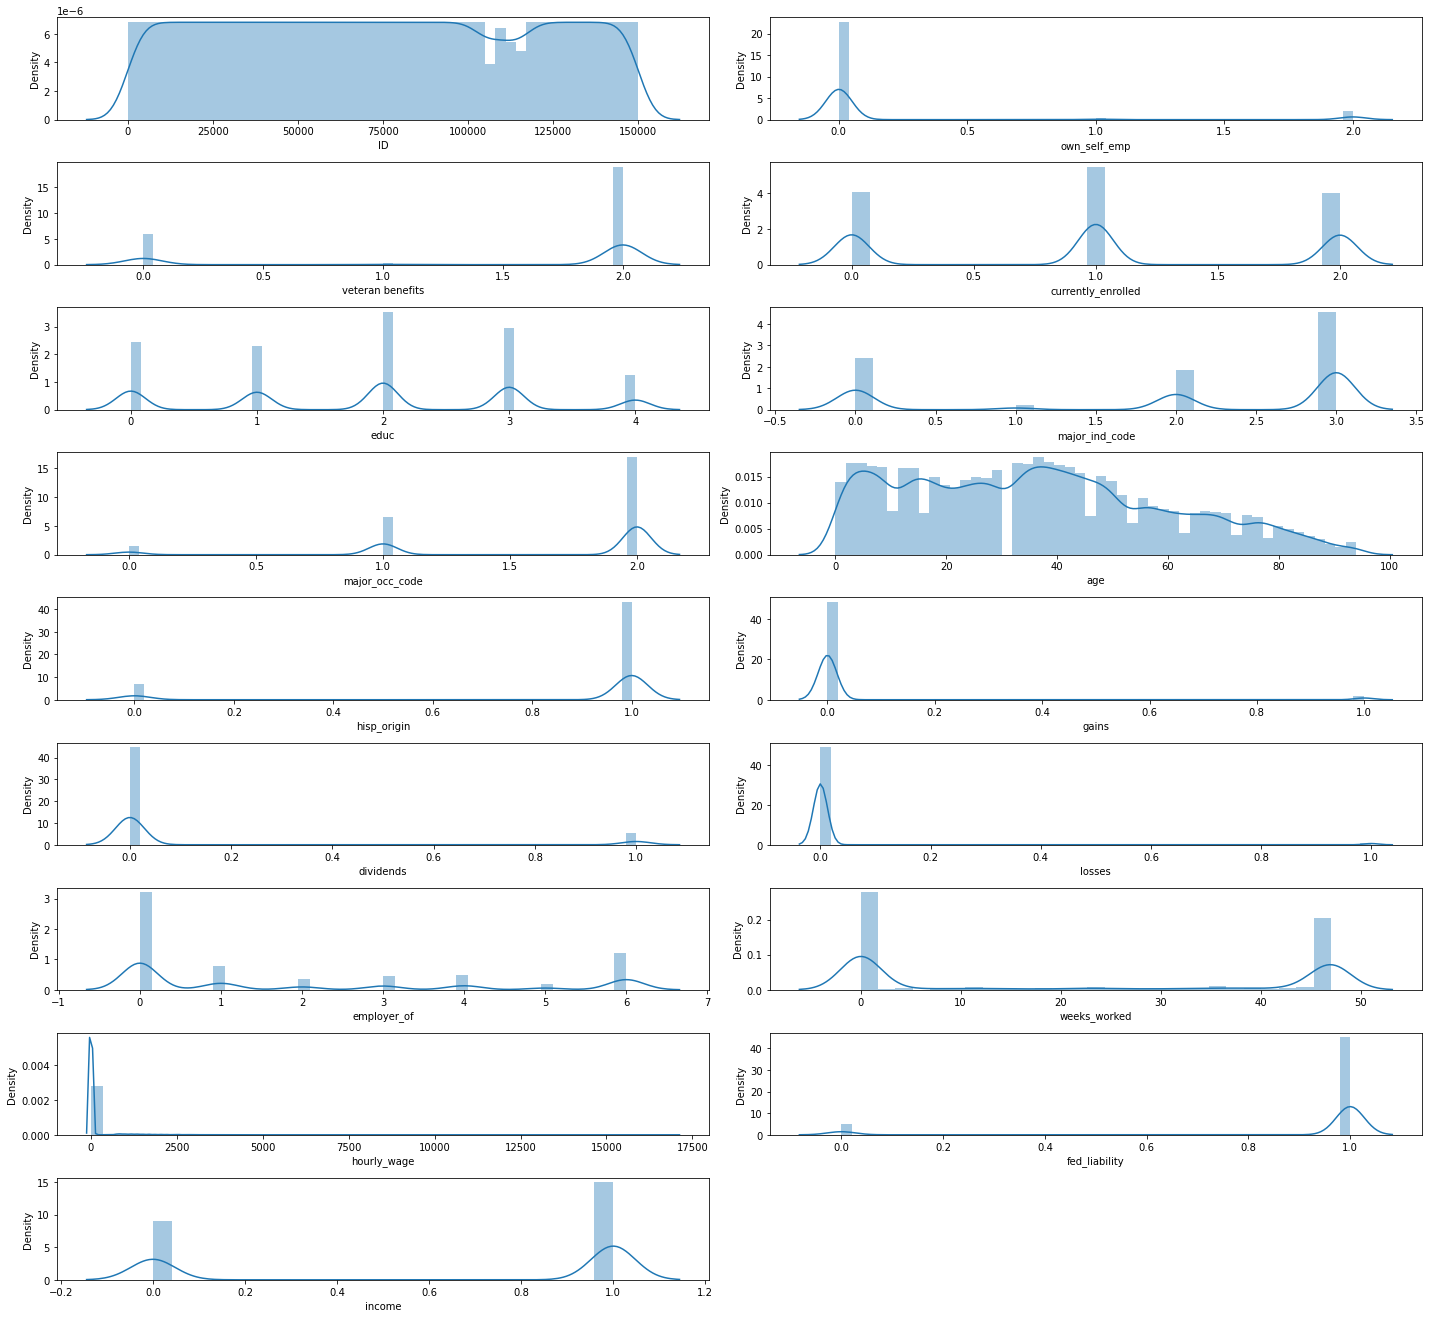

In [82]:
num=combine.select_dtypes(include=np.number)
plt.rcParams['figure.figsize']=[20,20]
a=10
b=2
c=1
for i in num:
    plt.subplot(a,b,c)
    sns.distplot(combine[i])
    c+=1
    
plt.tight_layout()
plt.show()

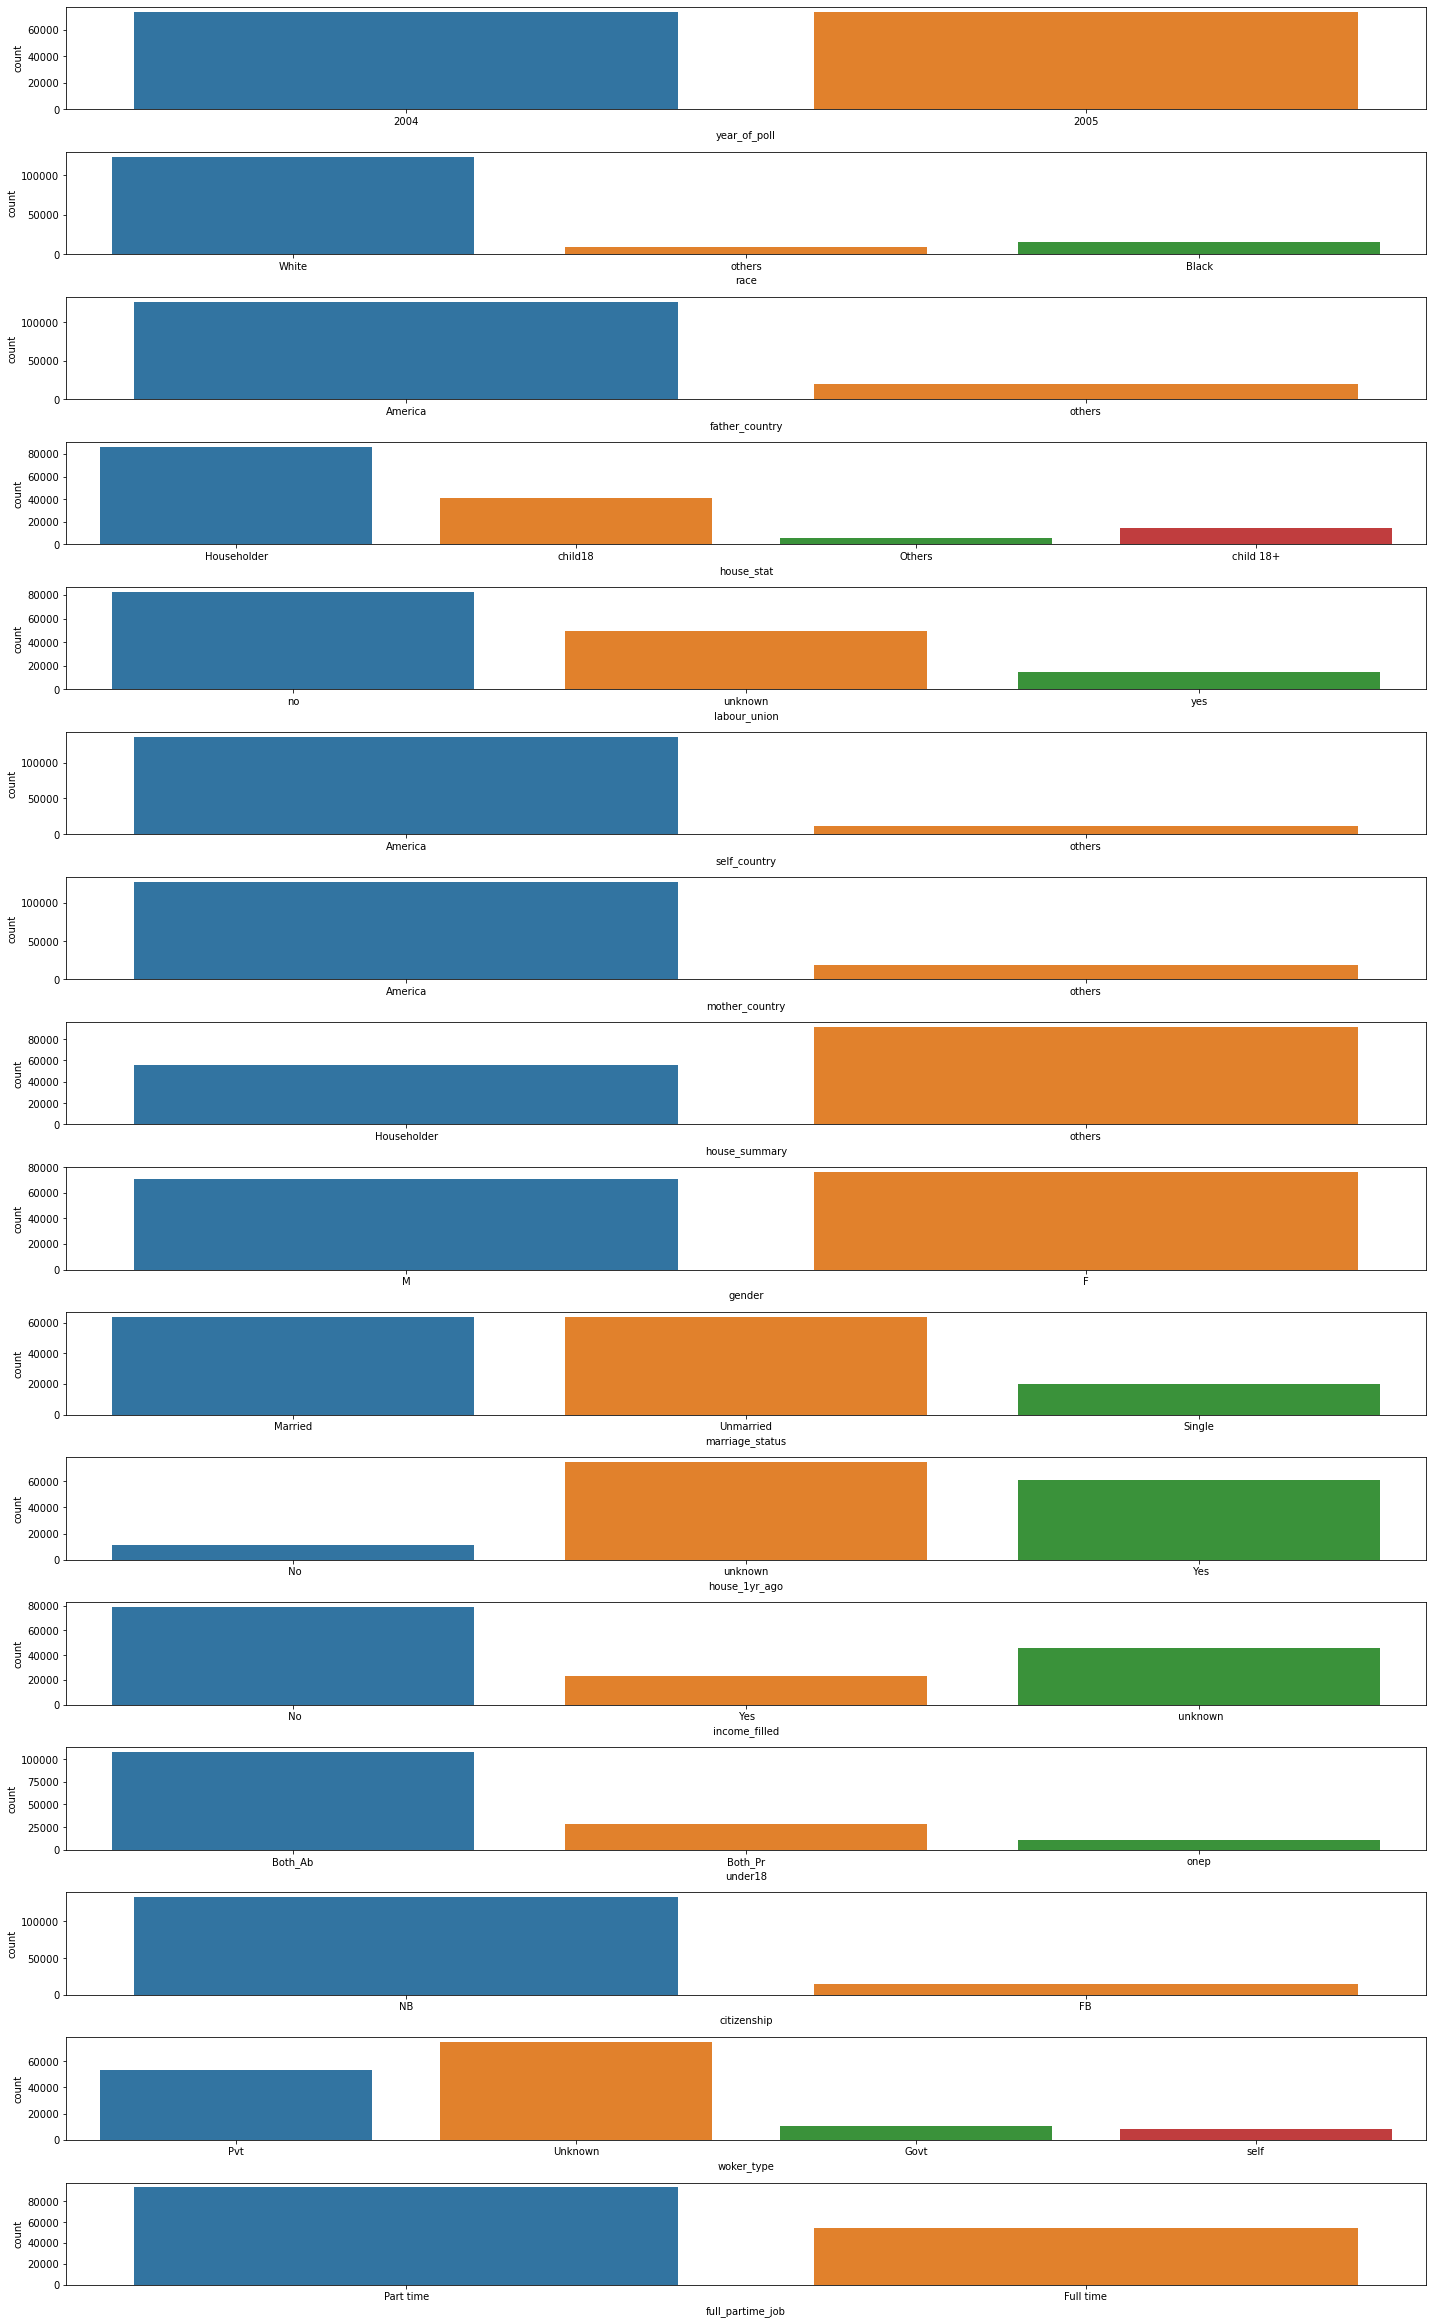

In [160]:
cat=combine.select_dtypes(exclude=np.number)
plt.rcParams['figure.figsize']=[20,40]
a=20
b=1
c=1
for i in cat:
    plt.subplot(a,b,c)
    sns.countplot(combine[i])
    #plt.xticks(rotation=90)
    c+=1
    
plt.tight_layout()
plt.show()

## Inference
* Part Time Jobs are higher.
* Native Born are higher.
* Females are higher
* Single are less in number.
* In all three Countries(Father,Mother and Self) United States is Dominating
* Race White is more

# Dropping Columns

In [84]:
combine=combine.drop(['ID','unemp_reason'],axis=1)

## Null values

In [85]:

combine.isnull().sum()

year_of_poll              0
own_self_emp              0
veteran benefits          0
currently_enrolled        0
race                      0
father_country            0
educ                      0
house_stat                0
major_ind_code            0
labour_union          49668
self_country              0
major_occ_code            0
age                     596
mother_country            0
house_summary             0
gender                    0
hisp_origin               0
gains                     0
dividends                 0
marriage_status           0
losses                    0
employer_of               0
house_1yr_ago         74720
income_filled         45411
weeks_worked              0
under18                   0
hourly_wage               0
citizenship               0
woker_type                0
fed_liability             0
full_partime_job          0
income                42000
dtype: int64

## Filling Missing  values

In [86]:
combine['age']=combine['age'].fillna(combine['age'].mean())

combine['labour_union']=combine['labour_union'].fillna('unknown')

combine['house_1yr_ago']=combine['house_1yr_ago'].fillna('unknown')

combine['income_filled']=combine['income_filled'].fillna(' unknown')

In [87]:
combine.isnull().sum()

year_of_poll              0
own_self_emp              0
veteran benefits          0
currently_enrolled        0
race                      0
father_country            0
educ                      0
house_stat                0
major_ind_code            0
labour_union              0
self_country              0
major_occ_code            0
age                       0
mother_country            0
house_summary             0
gender                    0
hisp_origin               0
gains                     0
dividends                 0
marriage_status           0
losses                    0
employer_of               0
house_1yr_ago             0
income_filled             0
weeks_worked              0
under18                   0
hourly_wage               0
citizenship               0
woker_type                0
fed_liability             0
full_partime_job          0
income                42000
dtype: int64

## Dummy n-1 encoding

In [88]:
dummy=pd.get_dummies(combine,drop_first=True)

## Splitting Train and Test

In [89]:
newtrain=dummy.iloc[0:train.shape[0],:]
newtest=dummy.iloc[train.shape[0]:,:]

In [90]:
newtrain.head()

,own_self_emp,veteran benefits,currently_enrolled,educ,major_ind_code,major_occ_code,age,hisp_origin,gains,dividends,...,house_1yr_ago_unknown,income_filled_ Yes,income_filled_ unknown,under18_Both_Pr,under18_onep,citizenship_NB,woker_type_Pvt,woker_type_Unknown,woker_type_self,full_partime_job_Part time
0,0,2,2,0,0,2,42.0,1,0,0,...,0,0,0,0,0,1,1,0,0,1
1,0,0,1,3,3,2,10.0,0,0,0,...,1,0,0,1,0,1,0,1,0,1
2,0,2,0,1,0,2,46.0,1,0,0,...,0,1,0,0,0,1,1,0,0,1
3,0,2,1,2,2,2,35.0,1,0,0,...,0,0,1,0,0,1,1,0,0,1
4,0,2,0,2,2,0,61.0,1,0,0,...,0,0,1,0,0,1,1,0,0,1


## Lets split our Train data into test and train data for Validation


In [91]:
X=newtrain.drop('income',axis=1)
y=newtrain['income']

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
Sc=StandardScaler()

In [94]:
X=pd.DataFrame(Sc.fit_transform(X),columns=X.columns)

newtest=pd.DataFrame(Sc.transform(newtest.drop('income',axis=1)),columns=X.columns)

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2,stratify=y)

## Modelling

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [99]:
from sklearn.metrics import accuracy_score

## logistic Regression

In [100]:
import statsmodels.api as sm

In [101]:
X_train['const']=1
X_test['const']=1

In [102]:
model=sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.650877
         Iterations 4


In [103]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                84000
Model:                          Logit   Df Residuals:                    83958
Method:                           MLE   Df Model:                           41
Date:                Tue, 13 Sep 2022   Pseudo R-squ.:                 0.01866
Time:                        12:32:22   Log-Likelihood:                -54674.
converged:                       True   LL-Null:                       -55713.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
own_self_emp                   0.0156      0.008      2.063      0.039       0.001       0.030
veteran benefits               0.0671      0.017      3.878      0.000       0.033       0.101
currently_enrolled             0.0081      0.007      1.115      0.265      -0.006       0.022
educ                           0.1025      0.010     10.455      0.000       0.083       0.122
major_ind_code                -0.0143      0.013     -1.072      0.284      -0.041       0.012
major_occ_code                 0.1284      0.010     12.978      0.000       0.109       0.148
age                           -0.0488      0.015     -3.284      0.001      -0.078      -0.020
hisp_origin                   -0.0083      0.008     -1.017      0.309      -0.024       0.008
gains                         -0.0850      0.007    -11.612      0.000      -0.099      -0.071
dividends                     -0.0998      0.008    -13.176      0.000      -0.115      -0.085
losses                        -0.0591      0.007     -8.289      0.000      -0.073      -0.045
employer_of                   -0.0508      0.012     -4.171      0.000      -0.075      -0.027
weeks_worked                  -0.0732      0.017     -4.307      0.000      -0.107      -0.040
hourly_wage                    0.0097      0.008      1.293      0.196      -0.005       0.024
fed_liability                 -0.0289      0.008     -3.721      0.000      -0.044      -0.014
year_of_poll_2005              0.0572      0.043      1.332      0.183      -0.027       0.141
race_White                    -0.0074      0.009     -0.801      0.423      -0.025       0.011
race_others                   -0.0043      0.009     -0.457      0.647      -0.023       0.014
father_country_others         -0.0086      0.013     -0.674      0.500      -0.034       0.016
house_stat_Others             -0.0147      0.009     -1.598      0.110      -0.033       0.003
house_stat_child 18+          -0.0292      0.012     -2.517      0.012      -0.052      -0.006
house_stat_child18            -0.1354      0.041     -3.283      0.001      -0.216      -0.055
labour_union_unknown          -0.0008      0.007     -0.111      0.911      -0.016       0.014
labour_union_yes              -0.0024      0.007     -0.322      0.747      -0.017       0.012
self_country_others            0.0062      0.012      0.515      0.606      -0.018       0.030
mother_country_others         -0.0005      0.013     -0.038      0.969      -0.026       0.025
house_summary_others           0.0697      0.012      5.716      0.000       0.046       0.094
gender_M                      -0.0746      0.008     -8.908      0.000      -0.091      -0.058
marriage_status_Single         0.0289      0.009      3.111      0.002       0.011       0.047
marriage_status_Unmarried      0.0877      0.015      5.862      0.000       0.058       0.117
house_1yr_ago_ Yes            -0.0169      0.014     -1.203      0.229      -0.045       0.011
house_1yr_a

## Significant values filteration using p values

In [104]:
signi=model.pvalues[model.pvalues<0.05].index

In [105]:
X_train=X_train.drop('const',axis=1)

In [106]:
X_test=X_test.drop('const',axis=1)

## Decision Tree

In [107]:
from sklearn.tree import DecisionTreeClassifier
dct=DecisionTreeClassifier(max_depth=8,min_samples_split=45)

In [110]:
d=dct.fit(X_train,y_train)

In [111]:
pr=d.predict(X_test)

In [112]:
accuracy_score(y_test,pr)

0.6399047619047619

## Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=8,min_samples_split=50)

In [118]:
rf=RandomForestClassifier(n_estimators=350,max_depth=12)

In [114]:
predrf=rf.fit(X_train,y_train).predict(X_test)

In [115]:
accuracy_score(y_test,predrf)

0.6439523809523809

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
g=GradientBoostingClassifier(min_samples_split=45)

In [ ]:
G=g.fit(X_train[signi].drop('const',axis=1),y_train)

In [ ]:
pg=G.predict(X_test[signi].drop('const',axis=1))

In [ ]:
accuracy_score(y_test,pg)

## Voting And Stacking Classifier


In [128]:
from lightgbm import LGBMClassifier

In [ ]:
from sklearn.ensemble import VotingClassifier,StackingClassifier

In [120]:
Classifierstunned = [('0.XGBoost' , XGBClassifier(learning_rate =0.1,
                                           n_estimators=450,
                                           max_depth=5,
                                           subsample = 0.70,
                                           verbosity = 0,
                                           scale_pos_weight = 2.5)),
               ('1.CatBoost' , CatBoostClassifier(learning_rate=0.15,
                                                 n_estimators=450,
                                                subsample=0.0185,
                                                 max_depth=5,
                                               scale_pos_weight=2.5)),
               ('2.LightGBM' , LGBMClassifier(subsample_freq = 2,
                                             objective ="binary",
                                             importance_type = "gain",
                                             verbosity = -1,
                                             max_bin = 60,
                                             num_leaves = 300,
                                             learning_rate=0.15,
                                             n_estimators=450,
                                             max_depth=5,
                                             scale_pos_weight=2.5))]

NameError: name 'LGBMClassifier' is not defined

In [ ]:
X_train[signi].columns

In [ ]:
vmtunned=VotingClassifier(estimators=Classifierstunned)
model_votingtunned=vmtunned.fit(X_train[signi].drop('const',axis=1),y_train)

In [ ]:
accuracy_score(y_test,pred)

In [129]:
lg = LogisticRegression(random_state=140)
rf = RandomForestClassifier(n_estimators=250,max_depth=12)
gbm = GradientBoostingClassifier (random_state = 50)
xgb = XGBClassifier (random_state = 138)
lgbm = LGBMClassifier()
cboost=CatBoostClassifier(random_state=42,max_depth=12,n_estimators=100)

## Light Gbm

In [130]:
pred_gbm=lgbm.fit(X_train,y_train).predict(X_test)

In [131]:
accuracy_score(y_test,pred_gbm)

0.6443333333333333

In [133]:
pred_g=gbm.fit(X,y).predict(newtest)

In [134]:
#to display all columns
pd.set_option('display.max_columns', None)
X.head()

,own_self_emp,veteran benefits,currently_enrolled,educ,major_ind_code,major_occ_code,age,hisp_origin,gains,dividends,losses,employer_of,weeks_worked,hourly_wage,fed_liability,year_of_poll_2005,race_White,race_others,father_country_others,house_stat_Others,house_stat_child 18+,house_stat_child18,labour_union_unknown,labour_union_yes,self_country_others,mother_country_others,house_summary_others,gender_M,marriage_status_Single,marriage_status_Unmarried,house_1yr_ago_ Yes,house_1yr_ago_unknown,income_filled_ Yes,income_filled_ unknown,under18_Both_Pr,under18_onep,citizenship_NB,woker_type_Pvt,woker_type_Unknown,woker_type_self,full_partime_job_Part time
0,-0.318189,0.567847,1.298330,-1.476007,-1.549767,0.642674,0.245296,0.404079,-0.195673,-0.343576,-0.13956,-0.403516,1.184200,-0.202694,0.331,-1.000610,0.438321,-0.249624,-0.400164,-0.201758,-0.326644,-0.618030,-0.712128,-0.331549,-0.286405,-0.391537,-1.279478,1.040476,-0.394154,-0.874831,-0.840098,-1.015782,-0.431089,-0.668087,-0.491458,-0.281253,0.328515,1.328744,-1.012227,-0.248848,0.761557
1,-0.318189,-1.784970,0.003355,0.900913,0.831943,0.642674,-1.118390,-2.474761,-0.195673,-0.343576,-0.13956,-0.826908,-0.948135,-0.202694,0.331,0.999391,0.438321,-0.249624,2.498975,-0.201758,-0.326644,1.618045,1.404242,-0.331549,-0.286405,-0.391537,0.781569,1.040476,-0.394154,1.143078,-0.840098,0.984464,-0.431089,-0.668087,2.034762,-0.281253,0.328515,-0.752591,0.987921,-0.248848,0.761557
2,-0.318189,0.567847,-1.291620,-0.683700,-1.549767,0.642674,0.415757,0.404079,-0.195673,-0.343576,-0.13956,1.713442,1.184200,-0.202694,0.331,-1.000610,0.438321,-0.249624,-0.400164,4.956421,-0.326644,-0.618030,1.404242,-0.331549,-0.286405,-0.391537,0.781569,1.040476,2.537082,-0.874831,-0.840098,-1.015782,2.319707,-0.668087,-0.491458,-0.281253,0.328515,1.328744,-1.012227,-0.248848,0.761557
3,-0.318189,0.567847,0.003355,0.108606,0.038039,0.642674,-0.053010,0.404079,-0.195673,-0.343576,-0.13956,0.019875,1.184200,-0.202694,0.331,-1.000610,-2.281434,4.006023,-0.400164,-0.201758,-0.326644,-0.618030,-0.712128,-0.331549,-0.286405,-0.391537,-1.279478,1.040476,-0.394154,-0.874831,1.190338,-1.015782,-0.431089,1.496810,-0.491458,-0.281253,0.328515,1.328744,-1.012227,-0.248848,0.761557
4,-0.318189,0.567847,-1.291620,0.108606,0.038039,-2.683057,1.054985,0.404079,-0.195673,-0.343576,-0.13956,0.443267,1.184200,-0.202694,0.331,-1.000610,0.438321,-0.249624,-0.400164,-0.201758,-0.326644,-0.618030,-0.712128,-0.331549,-0.286405,-0.391537,-1.279478,-0.961099,2.537082,-0.874831,1.190338,-1.015782,-0.431089,1.496810,-0.491458,-0.281253,0.328515,1.328744,-1.012227,-0.248848,0.761557


In [135]:
newtest.columns

Index(['own_self_emp', 'veteran benefits', 'currently_enrolled', 'educ',
       'major_ind_code', 'major_occ_code', 'age', 'hisp_origin', 'gains',
       'dividends', 'losses', 'employer_of', 'weeks_worked', 'hourly_wage',
       'fed_liability', 'year_of_poll_2005', 'race_White', 'race_others',
       'father_country_others', 'house_stat_Others', 'house_stat_child 18+',
       'house_stat_child18', 'labour_union_unknown', 'labour_union_yes',
       'self_country_others', 'mother_country_others', 'house_summary_others',
       'gender_M', 'marriage_status_Single', 'marriage_status_Unmarried',
       'house_1yr_ago_ Yes', 'house_1yr_ago_unknown', 'income_filled_ Yes',
       'income_filled_ unknown', 'under18_Both_Pr', 'under18_onep',
       'citizenship_NB', 'woker_type_Pvt', 'woker_type_Unknown',
       'woker_type_self', 'full_partime_job_Part time'],
      dtype='object')

## Cat Boost

In [136]:
cboost.fit(X,y,verbose=1)

Learning rate set to 0.5
0:	learn: 0.6547501	total: 601ms	remaining: 59.5s
1:	learn: 0.6422766	total: 1.01s	remaining: 49.5s
2:	learn: 0.6368243	total: 1.41s	remaining: 45.5s
3:	learn: 0.6326804	total: 1.8s	remaining: 43.3s
4:	learn: 0.6272594	total: 2.32s	remaining: 44.1s
5:	learn: 0.6244644	total: 3s	remaining: 47s
6:	learn: 0.6202446	total: 3.58s	remaining: 47.5s
7:	learn: 0.6144066	total: 4.09s	remaining: 47s
8:	learn: 0.6098282	total: 4.62s	remaining: 46.7s
9:	learn: 0.6055558	total: 4.95s	remaining: 44.5s
10:	learn: 0.6006582	total: 5.45s	remaining: 44.1s
11:	learn: 0.5976992	total: 5.82s	remaining: 42.7s
12:	learn: 0.5921496	total: 6.29s	remaining: 42.1s
13:	learn: 0.5891273	total: 6.82s	remaining: 41.9s
14:	learn: 0.5866571	total: 7.36s	remaining: 41.7s
15:	learn: 0.5838917	total: 7.87s	remaining: 41.3s
16:	learn: 0.5807767	total: 8.38s	remaining: 40.9s
17:	learn: 0.5763888	total: 8.88s	remaining: 40.5s
18:	learn: 0.5763886	total: 8.93s	remaining: 38s
19:	learn: 0.5724267	total

In [138]:
pred_c=cboost.fit(X,y).predict(newtest.drop('income',axis=1))

Learning rate set to 0.5
0:	learn: 0.6547501	total: 389ms	remaining: 38.5s
1:	learn: 0.6422766	total: 777ms	remaining: 38.1s
2:	learn: 0.6368243	total: 1.17s	remaining: 37.9s
3:	learn: 0.6326804	total: 1.59s	remaining: 38.1s
4:	learn: 0.6272594	total: 2s	remaining: 38s
5:	learn: 0.6244644	total: 2.42s	remaining: 37.9s
6:	learn: 0.6202446	total: 2.81s	remaining: 37.3s
7:	learn: 0.6144066	total: 3.21s	remaining: 36.9s
8:	learn: 0.6098282	total: 3.61s	remaining: 36.5s
9:	learn: 0.6055558	total: 4.3s	remaining: 38.7s
10:	learn: 0.6006582	total: 4.89s	remaining: 39.6s
11:	learn: 0.5976992	total: 5.25s	remaining: 38.5s
12:	learn: 0.5921496	total: 5.62s	remaining: 37.6s
13:	learn: 0.5891273	total: 5.98s	remaining: 36.7s
14:	learn: 0.5866571	total: 6.31s	remaining: 35.8s
15:	learn: 0.5838917	total: 6.66s	remaining: 34.9s
16:	learn: 0.5807767	total: 6.98s	remaining: 34.1s
17:	learn: 0.5763888	total: 7.33s	remaining: 33.4s
18:	learn: 0.5763886	total: 7.36s	remaining: 31.4s
19:	learn: 0.5724267	t

KeyError: "['income'] not found in axis"

## Stacking CLassifier

In [139]:
from sklearn.ensemble import StackingClassifier
level1 = [('rf',rf),('lgbm',lgbm)]
#level0=[('lgbm',lgbm)]
stack = StackingClassifier(estimators=level1,cv = 5,)
pred_stack = stack.fit(X_train,y_train).predict(X_test)

In [140]:
accuracy_score(y_test,pred_stack)

0.6444761904761904

In [142]:
from sklearn.ensemble import StackingClassifier
level1 = [('rf',rf)]
level0=[('lgbm',lgbm)]
stack = StackingClassifier(estimators=level0,final_estimator=lgbm,cv = 5,)
pred_stack1 = stack.fit(X,y).predict(newtest)

## Support Vector Machine

## Lets try SMOTE 

In [143]:
from imblearn.over_sampling import SMOTE

In [144]:
sm = SMOTE()
X_final, y_final = sm.fit_resample(X, y)

In [146]:
predx=lgbm.fit(X_final,y_final).predict(newtest)

* SMOTE Not Working Here

## Extra Tree Classifier

In [147]:
from sklearn.tree import ExtraTreeClassifier


In [148]:
ext=ExtraTreeClassifier()

In [149]:
pred_r=ext.fit(X_train,y_train).predict(X_test)

In [150]:
accuracy_score(y_test,pred_r)

0.5435714285714286

## lgbm tunned

In [151]:
lgbm = LGBMClassifier(n_estimators=100,max_depth=10,random_state=2,learning_rate=0.5)

In [152]:
pred_l=lgbm.fit(X_train,y_train).predict(X_test)

In [153]:

accuracy_score(y_test,pred_l)

0.6282857142857143

## Decision tree critrion changed

In [155]:
from sklearn.tree import DecisionTreeClassifier

In [156]:
dct=DecisionTreeClassifier(criterion='gini')

In [157]:
pred_dct=dct.fit(X_train,y_train).predict(X_test)

In [158]:
accuracy_score(y_test,pred_dct)

0.542952380952381

## Grid Search CV for random forest

In [ ]:
params=[{'n_estimators':[100,150,180,200,250,500],'max_depth':[5,7,9,11,13,15,17,21], 'min_samples_leaf':[2,4,5,7,9,10],'class_weight' : ["balanced", "balanced_subsample"]}]

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
G=GridSearchCV(estimator=rf,param_grid=params,cv=5)

In [ ]:
gbm=LGBMClassifier(learning_rate=0.01,max_depth=10,random_state = 150)

In [ ]:
pred=gbm.fit(X_train,y_train).predict(X_test)

In [ ]:
accuracy_score(y_test,pred)

In [ ]:
from sklearn.ensemble import StackingClassifier
level0 = [('cboost', cboost),('rf',rf)]
stack = StackingClassifier(estimators=level0,final_estimator=lgbm,cv = 5)
pred_stack = stack.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,pred_stack))

In [ ]:
cboost=CatBoostClassifier(depth=10,learning_rate=0.484683)

In [ ]:
pred1=cboost.fit(X_train,y_train).predict(X_test)

In [ ]:
accuracy_score(y_test,pred1)

## Modelling Inferences

* Our Actual test data is performing with higher accuracy then our validation test .
* Light GBM and Random forest are doing really well on this data.
* For Stacking we go for Random forest and lgbm.
* We can run our random forest multiple times as it takes random values eveytime so it help enhancing the accuracy.
